# 线性回归

## 最小二乘法

**预测的y值与真实y值之间的偏差值称为`损失值`，而表达这种损失的表达式叫着损失函数。我们的目标是最小化损失函数**

** 当我们定义线性回归的损失函数是每个点到直线的距离的平方和时，这种线性回归算法称之为最小二乘法。**

In [1]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split

我们先用y=5x+2直线生成100个点，还要加上浮动，避免所有的点能连成一条直线。

In [2]:
xs = range(100)
ys = [5*x+2+random.random()*50 for x in xs]

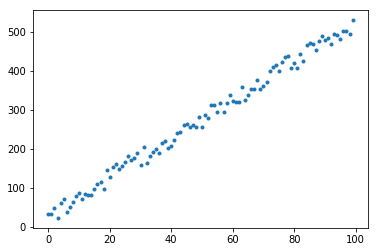

In [3]:
plt.scatter(xs,ys,marker='.') # 画点
plt.show()# 显示图形

使用sklearn的线性回归模型来预测y值

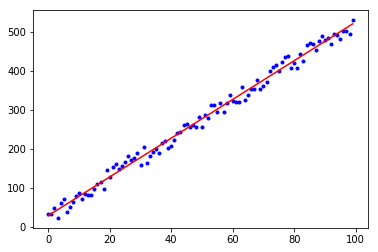

In [4]:
model = LinearRegression()
model.fit([[x] for x in xs],ys) # 使用训练集，得到拟合直线
ys_=model.predict([[x] for x in xs]) # 使用模型，得到预测值y
plt.scatter(xs,ys,marker='.',c='b') # 使用真实值y画点
plt.plot(xs,ys_,c='r') # 使用预测值y画成线
plt.show()
# 得到一条红色的线

## 线性回归预测波士顿房价数据

波士顿房价数据：特征有13个特征，所以预期要得到的线性方程为：

$$y=w_1x_1+w_2x_2+w_3x_3+...+w_12x_12+w_13x_13+b$$ 其中`w`为系数，`b`为截距。

化简：`b`可看成$w_0x_0$

$$y=w_0x_0+w_1x_1+w_2x_2+w_3x_3+...+w_12x_12+w_13x_13$$ 化简后 $$y=\sum_{i=0}^{13} (w_{i}^{T} x{_i}) $$

In [5]:
from sklearn.datasets import load_boston

In [6]:
loaded_data = load_boston()
data_x = loaded_data.data
data_y = loaded_data.target

In [7]:
data_df = pd.DataFrame(data_x,columns=loaded_data.feature_names)
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
x_train,x_test,y_train,y_test = train_test_split(data_df,data_y,test_size=0.2)

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('系数：',model.coef_) # 得到系数
print('截距：',model.intercept_) #得到截距
print('训练集准确率：',model.score(x_train,y_train))

系数： [-1.28134614e-01  5.28377612e-02  5.77312395e-03  1.89915610e+00
 -1.89228313e+01  3.62982414e+00  3.31817785e-04 -1.63091463e+00
  3.53551159e-01 -1.37609248e-02 -1.04117247e+00  9.37620303e-03
 -5.15886490e-01]
截距： 40.62325513482031
训练集准确率： 0.7342649898321281


In [11]:
y_pred = model.predict(x_test)
print('测试集准确率：',model.score(x_test,y_test))

测试集准确率： 0.7573888472712246


In [12]:
#模型测试。利用测试集得到对应的结果，并利用均方根误差（MSE）对测试结果进行评价：
from sklearn import metrics
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

MSE: 20.262062879361327


In [13]:
#交叉验证。我们使用10折交叉验证，即cv=10，并求出交叉验证得到的MSE值
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, data_x, data_y, cv=10)
print("MSE:", metrics.mean_squared_error(data_y, predicted))

MSE: 34.59704255768176


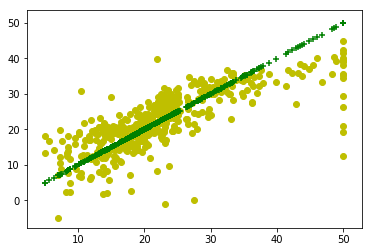

In [14]:
# 画图。将实际房价与预测房价进行对比，接近中间绿色直线的数据表示预测准确
plt.scatter(data_y, predicted, color='y', marker='o')
plt.scatter(data_y, data_y,color='g', marker='+')
plt.show()